# Logistic classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(font_scale=1.3)

## Load data

In [2]:
path = os.getcwd()
data = pd.read_csv(path+"/code/data/train.txt",header=None)
data.columns = ['feature 1', 'feature 2', 'class']
data.head()

,feature 1,feature 2,class
0,1.3672,2.4618,0
1,2.3105,2.1408,1
2,1.9940,1.2946,1
3,1.2645,2.9050,0
4,0.9876,2.3164,0


<Axes: xlabel='feature 1', ylabel='feature 2'>

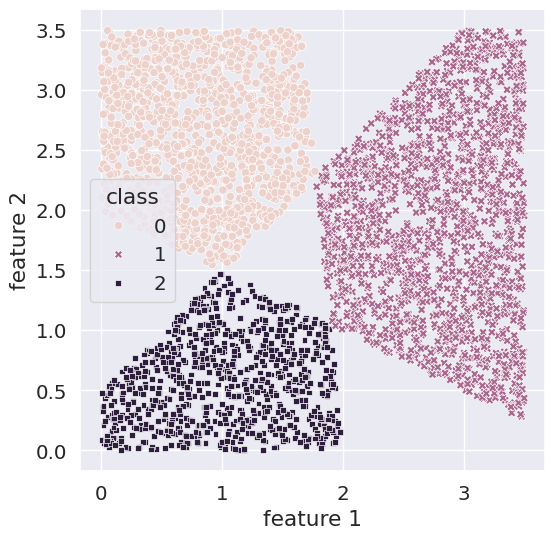

In [3]:
fig0, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=data, ax=ax, x='feature 1', y='feature 2', hue='class', style='class')

## Cost function and its gradient

The data points will be arranged as a matrix $X$
$$X=\left[\begin{array}{ccc}1&x_1^{(1)}&x_2^{(1)}\\1&x_1^{(2)}&x_2^{(2)}\\ \vdots&\vdots&\vdots\\ 1&x_1^{(m)}&x_2^{(m)} \end{array}\right],$$
where $m$ is the number of data points, and $x_k^{(i)}$ represents feature $k$ of data point $i$, while the class at which each point belongs will be stored in vector $y$
$$y=\left[\begin{array}{c}y^{(1)}\\y^{(2)}\\ \vdots\\ y^{(m)} \end{array}\right].$$
As the classifier is a One vs All scheme, the class vector has to be one-hot encoded: $0\rightarrow (1,0,0)$, $1\rightarrow (0,1,0)$, and $2\rightarrow (0,0,1)$
$$y=\left[\begin{array}{ccc}y_1^{(1)}&y_2^{(1)}&y_3^{(1)}\\y_1^{(2)}&y_2^{(2)}&y_3^{(2)}\\ \vdots&\vdots&\vdots\\ y_1^{(m)}&y_2^{(m)}&y_3^{(m)} \end{array}\right].$$
The weights are arranged in the matrix form
$$\Theta=\left[\begin{array}{ccc}\theta_{01}&\theta_{02}&\theta_{03}\\\theta_{11}&\theta_{12}&\theta_{13}\\ \theta_{21}&\theta_{22}&\theta_{23}\end{array}\right],$$
where $\theta_{kl}$ is the weight associated with feature $k$ and model (class) $l$.

<img src="figures/net.png" width=150/>

<div class="alert alert-success">

`log_classifier.py`
```python
#Create matrix X and convert to array
X = data.iloc[:,0:2].to_numpy()
b = np.ones((X.shape[0],1))
X = np.hstack((b,X))
#Create the y one-hot encoding
yl = data.iloc[:,2].to_numpy()
y = np.array([[1 if yl[j]==i else 0 for i in [0,1,2]] for j in range(len(yl))])
```
</div>

Therefore, once we have the weights $\Theta$, we can obtain the outputs for the likelihood of point $x^{(i)}$ to belong to each of the 3 classes $a_1$, $a_2$, and $a_3$ 
$$X\cdot\Theta=\left[\begin{array}{ccc}1&x_1^{(1)}&x_2^{(1)}\\1&x_1^{(2)}&x_2^{(2)}\\ \vdots&\vdots&\vdots\\ 1&x_1^{(m)}&x_2^{(m)} \end{array}\right]\left[\begin{array}{ccc}\theta_{01}&\theta_{02}&\theta_{03}\\\theta_{11}&\theta_{12}&\theta_{13}\\ \theta_{21}&\theta_{22}&\theta_{23}\end{array}\right]=\left[\begin{array}{ccc}z_1^{(1)}&z_2^{(1)}&z_3^{(1)}\\z_1^{(2)}&z_2^{(2)}&z_3^{(2)}\\\vdots&\vdots&\vdots\\z_1^{(m)}&z_2^{(m)}&z_3^{(m)}\\ \end{array}\right]=Z,$$
where $z_l^{(i)}=\sum_kx_k^{(i)}\theta_{kl}$. Then
</br>
$$A=f_{\Theta}(Z)=\left[\begin{array}{ccc}f_{\Theta}(z_1^{(1)})&f_{\Theta}(z_2^{(1)})&f_{\Theta}(z_3^{(1)})\\f_{\Theta}(z_1^{(2)})&f_{\Theta}(z_2^{(2)})&f_{\Theta}(z_3^{(2)})\\\vdots&\vdots&\vdots\\f_{\Theta}(z_1^{(m)})&f_{\Theta}(z_2^{(m)})&f_{\Theta}(z_3^{(m)})\\ \end{array}\right]=\left[\begin{array}{ccc}a_1^{(1)}&a_2^{(1)}&a_3^{(1)}\\a_1^{(2)}&a_2^{(2)}&a_3^{(2)}\\\vdots&\vdots&\vdots\\a_1^{(m)}&a_2^{(m)}&a_3^{(m)}\\ \end{array}\right],$$
where the activation function
$$f_{\Theta}(z_l^{(i)})=\frac{1}{1+e^{-z_l^{(i)}}},$$
is the logistic function.

In order to train the logistic classifier we need to define a cost function, and the goal of the training proces is to find the weights $\Theta$ that minimize such a cost function. The cost function used in the logistic regression is
$$J(\Theta)=-\frac{1}{m}\left[y:\log(A)+(1-y):\log(1-A)\right]+\frac{\lambda}{2m}\sum_{l=1}^3\sum_{k=1}^2\theta_{kl}^2,$$
where $\lambda$ is the regularization parameter, 1 is either a vector or a matrix of 1s, and "A:B" is the contraction between matrices $A$ and $B$, that is, perform the Hadamard (element-wise) product and then add all the elements.
We have that
$$y:\log(A)=\sum_{l=1}^n\sum_{i=1}^my_l^{(i)}\log(a_l^{(i)}).$$

The gradient of the cost function is
$$\frac{\partial J}{\partial\theta_{kl}}=-\frac{1}{m}\left[y:\partial_{\theta_{kl}}\log(A)+(1-y):\partial_{\theta_{kl}}\log(1-A)\right]+\frac{\lambda}{m}\theta_{kl}$$
where
$$y:\partial_{\theta_{kl}}\log(A)=\sum_i^my_l^{(i)}x_k^{(i)}(1-a_l^{(i)}),$$
$$(1-y):\partial_{\theta_{kl}}\log(1-A)=\sum_i^m(1-y_l^{(i)})x_k^{(i)}a_l^{(i)}.$$
Then
$$\frac{\partial J}{\partial\theta_{kl}}=\frac{1}{m}\sum_i^mx_k^{(i)}\left(a_l^{(i)}-y_l^{(i)}\right)+\frac{\lambda}{m}\theta_{kl}=\frac{1}{m}x_k\cdot(A_l-y_l)+\frac{\lambda}{m}\theta_{kl}.$$

<div class="alert alert-success">

`lc_functions.py`
```python
#Logistic function
def logistic(X, Theta):
    dot, t = npmatmul.matrix_multiply(X, Theta)
    return (1.0 / (1 + np.exp(-dot)), t)

#Cost function
def J(X, y, Theta, lamb):
    A, t = logistic(X,Theta)
    ones = np.ones((X.shape[0],3))
    A1 = ones - A
    logA = np.log(A)
    logA1 = np.log(A1)
    y1 = ones - y
    
    dot1 = np.sum(np.multiply(y,logA))
    dot2 = np.sum(np.multiply(y1,logA1))
    fact = lamb / (2*y.shape[0])
    thetac = np.copy(Theta)
    thetac[:,0] = 0
    reg = np.sum(fact*thetac**2)
    
    return (-(dot1 + dot2)/y.shape[0] + reg, t)

#Gradient of the cost function
def grad_J(X, y, Theta, lamb):
    A, t = logistic(X,Theta)
    Ay = A - y
    fact = lamb / y.shape[0]
    thetac = np.copy(Theta)
    thetac[:,0] = 0
    reg = fact*thetac

    mat, t1 = npmatmul.matrix_multiply(X.T,Ay)
    return (mat/y.shape[0] + reg, t+t1)
```
</div>          

## Gradient descent
In order to find the $\Theta$ that minimizes $J(\Theta)$ we use the gradient descent algorithm. The gradient descent algorithm is as follows:

1. Initialize $\Theta$.
2. Compute the gradient of the cost function $\partial J/\partial\theta_{kl}$.
3. Update the weights as $\theta_{kl}=\theta_{kl}-\alpha\ \partial J/\partial\theta_{kl}$, where $\alpha$ is the convergence parameter of the algorithm.

<div class="alert alert-success">

`lc_functions.py`
```python
#gradient descent
def grad_desc(X, y, lamb, alpha, epochs, iprint):
    epoch = []
    history = []
    #Initialize weight matrix
    Theta = 0.1*np.ones((X.shape[1],3))
    t = 0
    for e in range(epochs):
        grad, t1 = grad_J(X,y,Theta,lamb)
        Theta = Theta - alpha*grad
        t2 = 0
        if e%iprint == 0:
            epoch.append(e)
            cost, t2 = J(X,y,Theta,lamb)
            history.append(cost)
        t += t1 + t2
    return Theta, epoch, history, t
```
</div>    

<div class="alert alert-success">

`log_classifier.py`
```python
lamb = 0.1; # Regularization parameter
alpha = 0.005; # Convergence parameter
num_iters = 100000;
    
#Run gradient descent------------------------------
Th, ep, hist, t = lcf.grad_desc(X,y,lamb,alpha,num_iters,100)
```
</div>

In [4]:
#!srun -N 1 -c 8 python3.10 code/log_classifier.py
!python code/log_classifier.py

Matmul time: 2.5550432038508006s


### Exercise 1
1. Open the file `code/npmatmul.cpp` and identify the `matrix_multiply()` function.
2. Identify the part of the function that performs the matrix multiplication.
3. Identify the function `matrix_multiply_omp()`, which is missing the part that performs the matrix multiplication.
4. Write the matrix multiplication part, using OpenMP to parallelize it using 8 threads.
5. Compile the library: `$ sh build_module.sh`.
6. Open the `lc_functions.py` file and change all the occurrences of `npmatmul.matrix_multiply()` by `npmatmul.matrix_multiply_omp()`.
7. Re-run the training and check the time.
8. Estimate the speedup using 2, 4, and 8 threads.


In [ ]:
#!srun -N 1 -c 8 python3.10 code/log_classifier.py

| num_threads | matrix_multiply time | speedup |
| --- | --- | --- | 
| serial | 4.980533281045609s | 1 |
| 2 | 2.5550432038508006s | 1.95 |
| 4 | 1.5038226250426305s | 3.31 |
| 8 | 1.0268803020153427s | 4.85 |

In [5]:
#Load model
Th = []
with open(path+"/code/data/model.dat","r") as mdata:
    for line in mdata:
        v = list(map(float,line.split()))
        Th.append(v)
Th = np.asarray(Th)

#Load convergence data
ep = []
hist = []
with open(path+"/code/data/convergence.dat","r") as cdata:
    for line in cdata:
        v = list(map(float,line.split()))
        ep.append(v[0])
        hist.append(v[1])
                 

Text(0, 0.5, 'J')

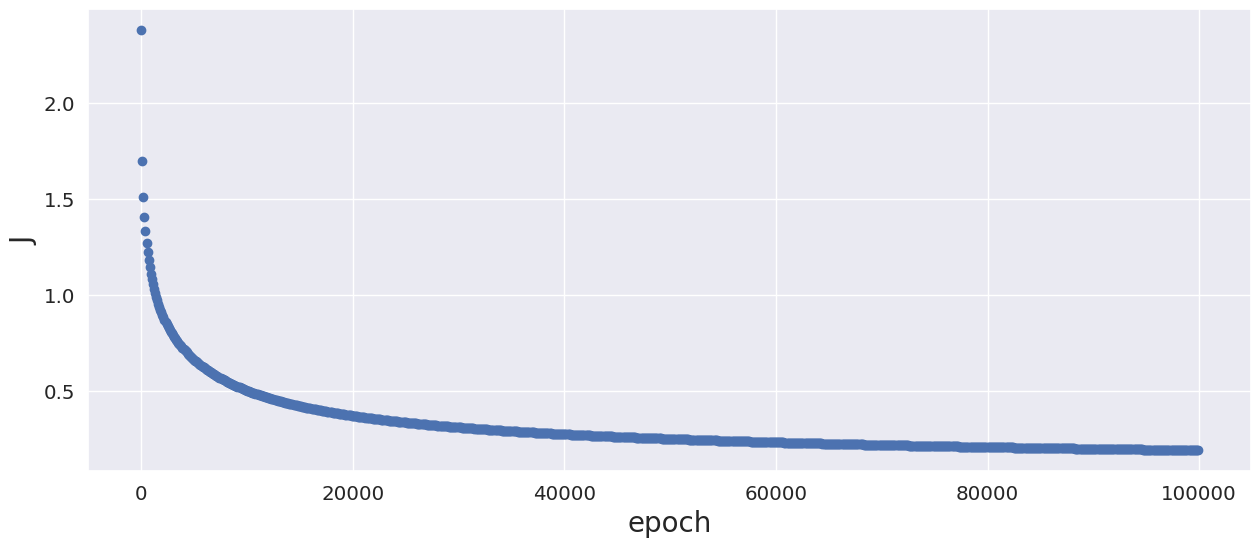

In [6]:
#Plot cost gradient descent convergence
fig1, ax = plt.subplots(figsize=(15, 6))
ax.plot(ep,hist,linestyle='',marker='o')
ax.set_xlabel('epoch',fontsize=20)
ax.set_ylabel('J',fontsize=20)
#ax.legend()

In [7]:
#The boundary is found when logistic(theta_min, x) = 0.5
# which is the same as x . theta_min = 0
def decisionBoundary(theta, xin, xfin, N):
    Dx = (xfin-xin) / N
    a = theta[1] / theta[2]
    b = theta[0] / theta[2]
    boundary = []
    for x in np.arange(xin, xfin+1, Dx):
        boundary.append([x, -a*x-b])
    return pd.DataFrame(boundary, columns=['x1', 'x2'])

In [8]:
dbf1 = decisionBoundary(Th.T[0],0,3.5,100)
dbf2 = decisionBoundary(Th.T[1],0,3.5,100)
dbf3 = decisionBoundary(Th.T[2],0,3.5,100)

(0.0, 3.5)

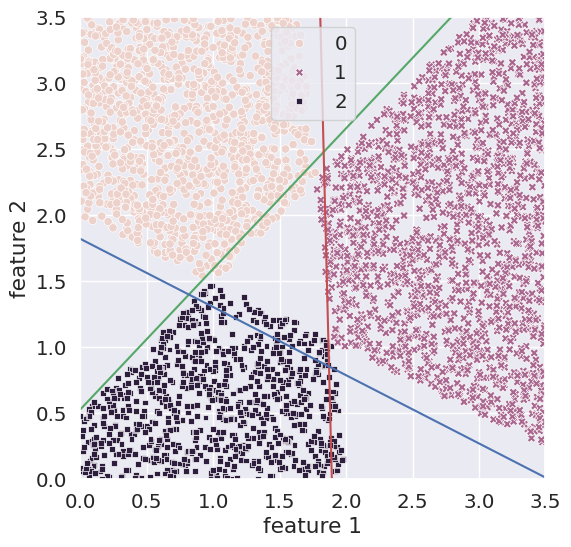

In [9]:
fig2, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data, ax=ax, x='feature 1', y='feature 2', hue='class', style='class')
sns.lineplot(data=dbf1, ax=ax, x='x1', y='x2', color='g')
sns.lineplot(data=dbf2, ax=ax, x='x1', y='x2', color='r')
sns.lineplot(data=dbf3, ax=ax, x='x1', y='x2', color='b')
plt.xlim(0,3.5)
plt.ylim(0,3.5)

## Test accuracy

In [10]:
test_data = pd.read_csv(path+"/code/data/test.txt",header=None)
test_data.columns = ['feature 1', 'feature 2', 'class']
test_data.head()

,feature 1,feature 2,class
0,1.9767,1.4386,1
1,1.2744,2.2656,0
2,0.4303,0.3320,2
3,1.1832,2.7589,0
4,2.2457,2.0252,1


<Axes: xlabel='feature 1', ylabel='feature 2'>

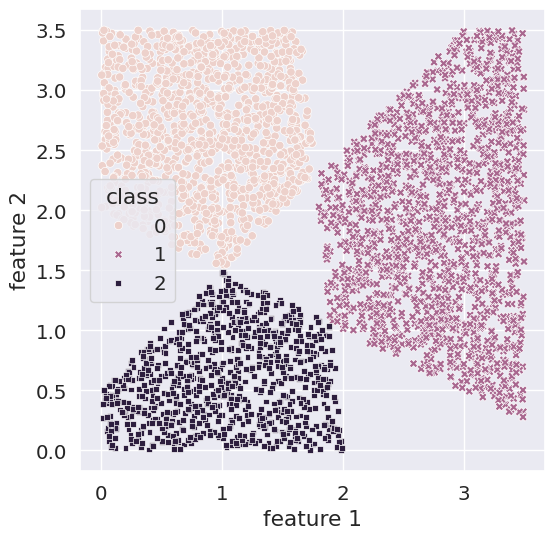

In [11]:
fig2, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=test_data, ax=ax, x='feature 1', y='feature 2', hue='class', style='class')

<div class="alert alert-success">

`test_accuracy.py`
```python
#Create matrix Xtest and convert to array
Xt = test_data.iloc[:,0:2].to_numpy()
bt = np.ones((Xt.shape[0],1))
Xt = np.hstack((bt,Xt))
#Create the ytest vector
yt = test_data.iloc[:,2].to_numpy()[np.newaxis].T #create a new axis to convert a 1d array
```
</div>

<div class="alert alert-success">

`lc_functions.py`
```python
#Function to predict all the samples in the training set with the trained model
def logi(z):
    return 1.0 / (1 + np.exp(-z))

def predictOneVsAll(X, Theta):
    mat, t = npmatmul.matrix_multiply(X,Theta)
    M = logi(mat)
    p = np.array([[np.where(row == np.max(row))[0][0]] for row in M])
    return p
```
</div>

<div class="alert alert-success">

`test_accuracy.py`
```python
pred = predictOneVsAll(Xt,Th)
print("Training set accuracy: {0:.3f}".format(np.mean(pred==yt)))
```
</div>

In [12]:
#!srun -N 1 -c 8 python3.10 code/test_accuracy.py
!python code/test_accuracy.py

Training set accuracy: 0.997
